In [167]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import matplotlib.patches as mpatches
import math
import matplotlib.lines as mlines
import os
import cv2 as cv
from IPython.display import Video
import matplotlib.cm as cm
import matplotlib.animation as animation
import matplotlib.image as mpimg
from statistics import mean
from scipy.optimize import curve_fit
from matplotlib.pyplot import figure

In [168]:
waves = np.linspace(7,13,120)
numwaves = len(waves)
img1 = np.zeros([numwaves,10,256,320])
img2 = np.zeros([numwaves,10,256,320])

In [169]:
waves[40]

9.016806722689076

In [170]:
#P3 instrument data in IRCSP2

In [171]:
for i in range(numwaves):
    with h5py.File('C:\\Users\\khart\\Documents\\Summer2022Campaign\\IRCSP2\\Calibration\\6.9.2023\\pixel_reg\\' + str(waves[i])+'deg_Camera1.h5', "r") as f:
        # List all groups
      #  print(f.keys())

        img1[i] = np.array(f[list(f.keys())[0]])
        
    with h5py.File('C:\\Users\\khart\\Documents\\Summer2022Campaign\\IRCSP2\\Calibration\\6.9.2023\\pixel_reg\\' + str(waves[i])+'_Camera2.h5', "r") as f:

        img2[i] = np.array(f[list(f.keys())[0]])

In [172]:
np.shape(img1)

(120, 10, 256, 320)

In [173]:
im1 = np.mean(img1,axis=1)
im2 = np.mean(img2,axis=1)
#im1 = np.mean(im1,axis=1)
#im2 = np.mean(im2,axis=1)
np.shape(im1)

(120, 256, 320)

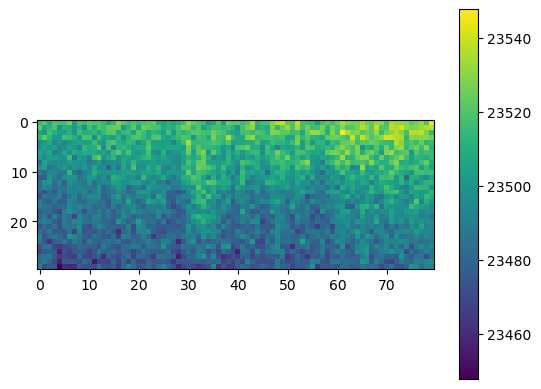

In [174]:
plt.style.use('default')

plt.imshow(im1[70,125:155,80:160])
plt.colorbar()

In [175]:
xmin1 = 80; xmax1 = 160; ymin1= 125; ymax1 = 155;

In [176]:
xmin1+28

108

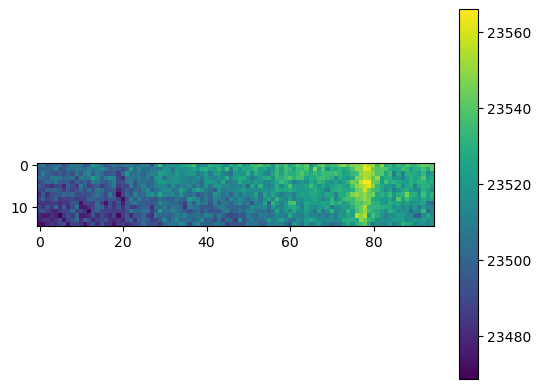

In [177]:
plt.style.use('default')

plt.imshow(im2[30,130:145,60:155])
plt.colorbar()

In [178]:
xmin2 = 60; xmax2 = 156; ymin2= 130; ymax2 = 145

In [179]:
#finding the max pixel count and location 

maxlocs1 = []
maxvals1 = []
maxlocs2 = []
maxvals2 = []
for i in range(numwaves):
    vmax1 = im1[i,ymin1:ymax1,xmin1:xmax1].max()
    vmax2 = im2[i,ymin2:ymax2,xmin2:xmax2].max()
    loc1 = np.where(im1[i,ymin1:ymax1,xmin1:xmax1] == vmax1)
    loc2 = np.where(im2[i,ymin2:ymax2,xmin2:xmax2] == vmax2)    
    maxlocs1.append(loc1[1][0])
    maxvals1.append(vmax1)
    maxlocs2.append(loc2[1][0])
    maxvals2.append(vmax2)

Text(0, 0.5, 'Max Response X Pixel Location')

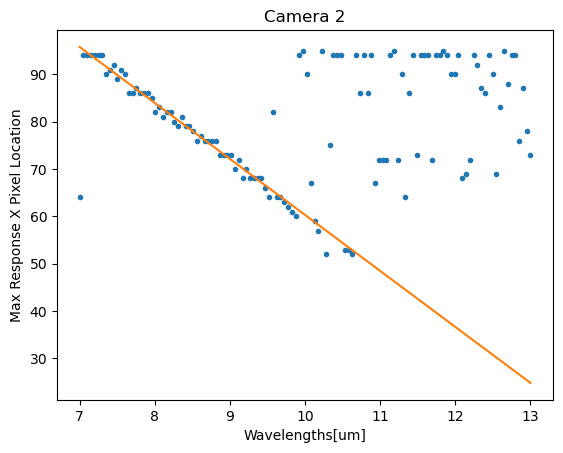

In [180]:
minpt =9; maxpt = 45;

m2, b2 = np.polyfit(waves[minpt:maxpt], maxlocs2[minpt:maxpt], 1)
fit2 = [m2,b2]
ROI2= [xmin2,xmax2,ymin2,ymax2]
plt.plot(waves, maxlocs2, '.', waves, m2*waves+b2)
plt.title('Camera 2')
plt.xlabel('Wavelengths[um]')
plt.ylabel('Max Response X Pixel Location')

In [189]:
#saving into cal file 


cal_file2 = 'C:\\Users\\khart\\Documents\\Summer2022Campaign\\IRCSP2\\Calibration\\6.9.2023\\cam2pixel.h5'

with h5py.File(cal_file2, "w") as hf:
    #create hdf5 file
    hf.create_dataset('/pixel_registration/fitparams',  data=fit2)
    hf.create_dataset('/pixel_registration/ROI',        data= ROI2)

hf.close()

Text(0, 0.5, 'Max Response Y Pixel Location')

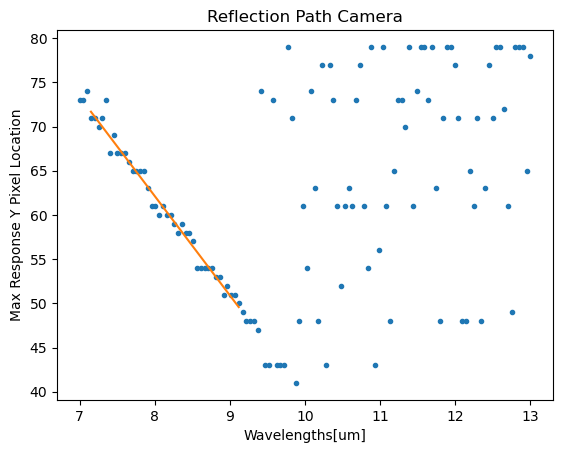

In [182]:
minpt = 3; maxpt = 43;

m1,b1 = np.polyfit(waves[minpt:maxpt], maxlocs1[minpt:maxpt], 1)
fit1 = [m1,b1]
ROI1= [xmin1,xmax1,ymin1,ymax1]
plt.plot(waves, maxlocs1, '.', waves[minpt:maxpt], m1*waves[minpt:maxpt]+b1)
plt.title('Reflection Path Camera')
plt.xlabel('Wavelengths[um]')
plt.ylabel('Max Response Y Pixel Location')

In [183]:
ROI2

[60, 156, 130, 145]

In [184]:
fit2

[-11.82087087087085, 178.512591162591]

In [190]:
#saving into cal file 

cal_file1 = 'C:\\Users\\khart\\Documents\\Summer2022Campaign\\IRCSP2\\Calibration\\6.9.2023\\cam1pixel.h5'

with h5py.File(cal_file1, "w") as hf:
    #create hdf5 file
    hf.create_dataset('/pixel_registration/fitparams',  data=fit1)
    hf.create_dataset('/pixel_registration/ROI',        data= ROI1)

In [191]:
hf.close()